In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #for plot styling
import numpy as np

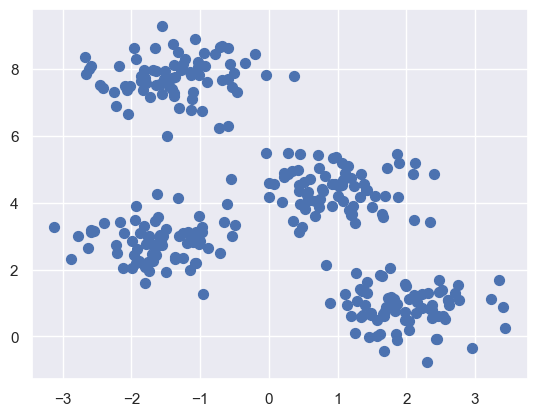

In [55]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.6, random_state=0)
plt.scatter(X[:,0], X[:, 1], s = 50)
plt.show()

In [57]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

C:\Users\veray\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


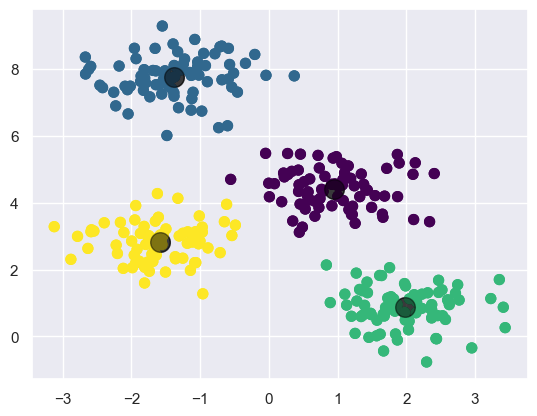

In [63]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed = 2):
    #1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        #2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        #2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                               for i in range(n_clusters)])
        #2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels 

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = "viridis")

plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5);
plt.show()

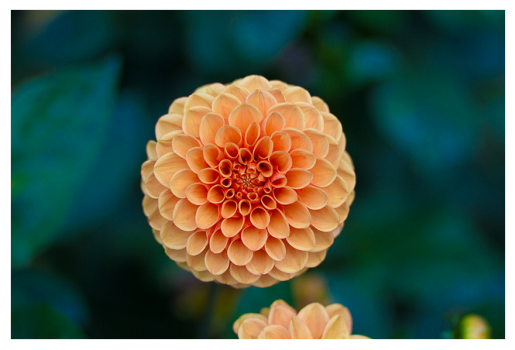

In [151]:
from sklearn.datasets import load_sample_image
china = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)
plt.show()

In [153]:
china.shape

(427, 640, 3)

In [155]:
china

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [157]:
data = china / 255.0 #use 0...1 sclae
data = data.reshape(427*640, 3)
data.shape

(273280, 3)

In [159]:
data

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

In [166]:
def plot_pixels(data, title, colors = None, N = 10000):
    if colors is None:
        colors = data

    #choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B  = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color = colors, marker = '.')
    ax[0].set(xlabel = "Red", ylabel = 'Green', xlim = (0,1), ylim = (0,1))

    ax[1].scatter(R, B, color = colors, marker = '.')
    ax[1].set(xlabel = "Red", ylabel = 'Blue', xlim = (0,1), ylim = (0,1))

    fig.suptitle(title, size = 20)

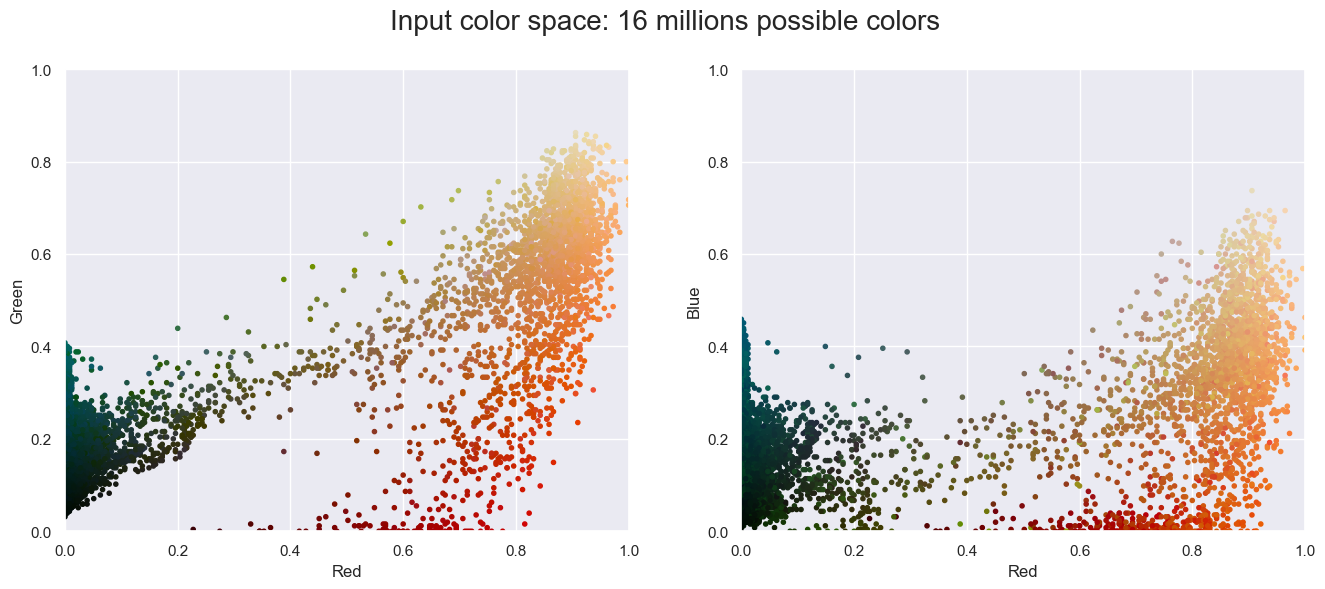

In [168]:
plot_pixels(data, title = "Input color space: 16 millions possible colors")
plt.show()

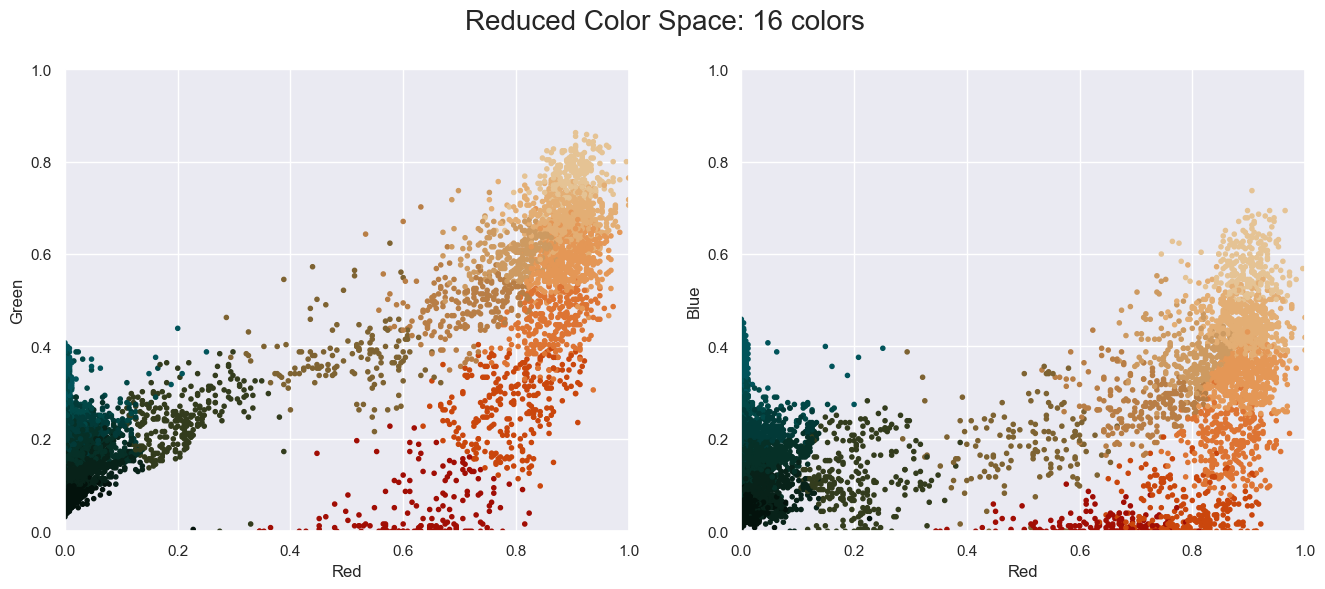

In [205]:
import warnings; warnings.simplefilter("ignore") #Fix Numpy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors = new_colors,
           title = "Reduced Color Space: 16 colors")
plt.show()

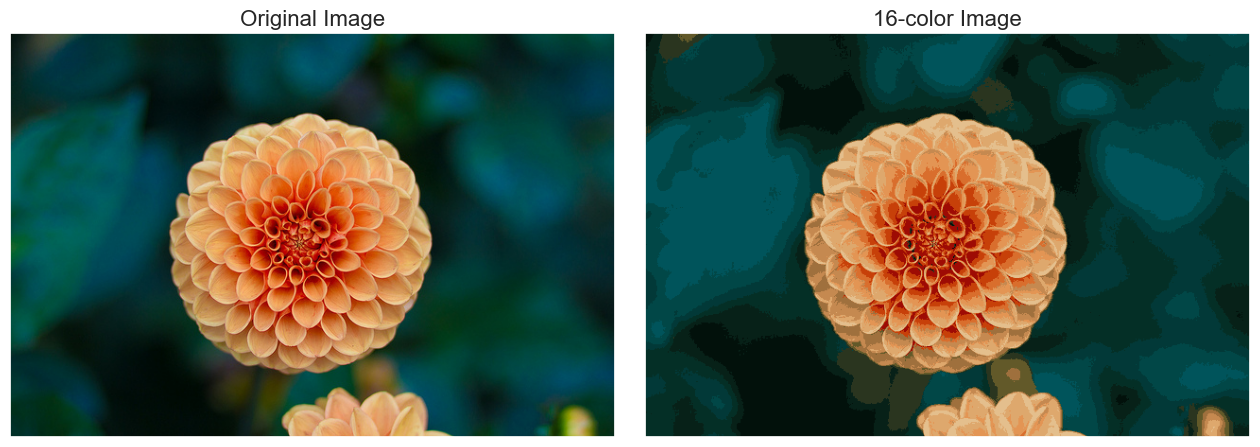

In [203]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize = (16, 6),
                      subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title("Original Image", size=16)
ax[1].imshow(china_recolored)
ax[1].set_title("16-color Image", size=16)
plt.show()

In [323]:
from sklearn.datasets import load_sample_image
china1 = load_sample_image("china.jpg")

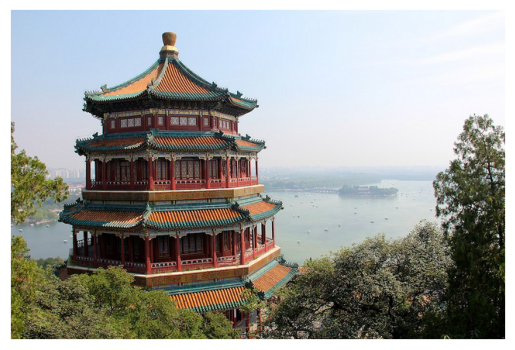

In [327]:
ax = plt.axes(xticks = [], yticks = [])
ax.imshow(china1)
plt.show()

In [266]:
china1.shape

(427, 640, 3)

In [268]:
data = china1 / 255
data = data.reshape(427*640, 3)
data.shape

(273280, 3)

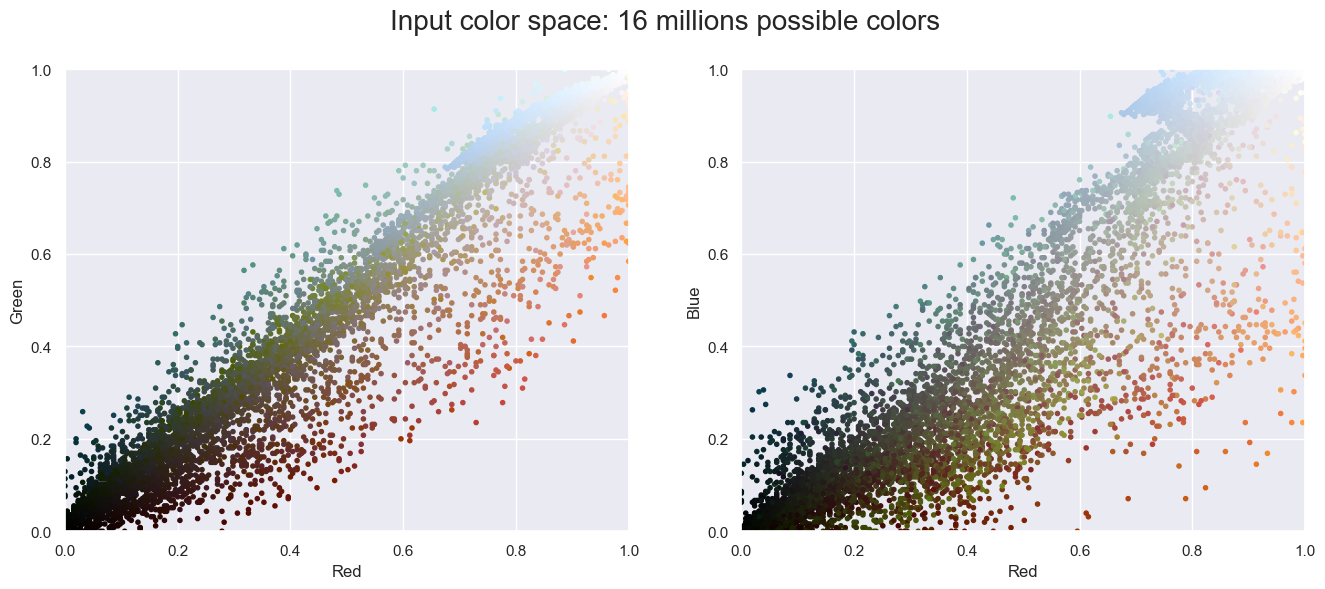

In [329]:
def plot_pixel(data, title, colors = None, N = 10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = data[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color = colors, marker = '.')
    ax[0].set(xlabel = "Red", ylabel = 'Green', xlim = (0,1), ylim = (0,1))

    ax[1].scatter(R, B, color = colors, marker = ".")
    ax[1].set(xlabel = "Red", ylabel = 'Blue', xlim = (0,1), ylim = (0,1))

    fig.subtitle(title, size = 20)

plot_pixels(data, title = "Input color space: 16 millions possible colors") 
plt.show()

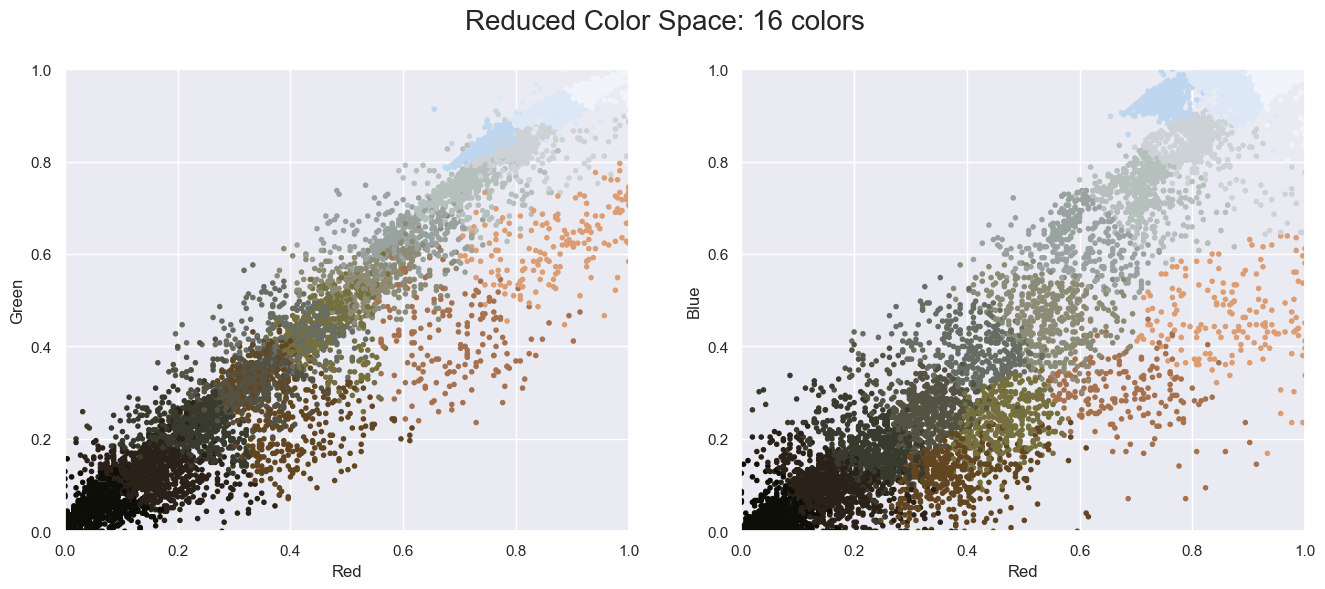

In [303]:
import warnings; warnings.simplefilter("ignore") #Fix Numpy issues.

from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors = new_colors, title = "Reduced Color Space: 16 colors") 
plt.show()

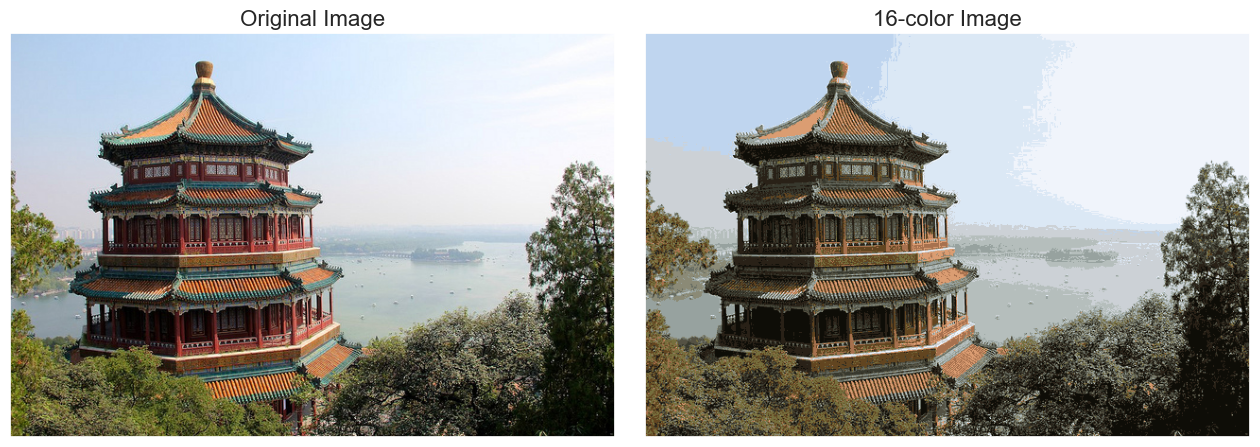

In [337]:
china1_recolored = new_colors.reshape(china1.shape)

fig, ax = plt.subplots(1, 2, figsize=(16,6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

ax[0].imshow(china1)
ax[0].set_title("Original Image", size=16)

ax[1].imshow(china_recolored)
ax[1].set_title("16-color Image", size=16)

plt.show()